<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Who's-paying-for-dinner?" data-toc-modified-id="Who's-paying-for-dinner?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Who's paying for dinner?</a></span><ul class="toc-item"><li><span><a href="#What-we-can-expect-to-happen:-theoretical-probability" data-toc-modified-id="What-we-can-expect-to-happen:-theoretical-probability-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>What we can expect to happen: theoretical probability</a></span><ul class="toc-item"><li><span><a href="#Probability-of-him-paying:-less-than-10-heads" data-toc-modified-id="Probability-of-him-paying:-less-than-10-heads-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Probability of him paying: less than 10 heads</a></span></li><li><span><a href="#Probability-of-me-paying:-more-than-10-heads" data-toc-modified-id="Probability-of-me-paying:-more-than-10-heads-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Probability of me paying: more than 10 heads</a></span></li><li><span><a href="#Probability-of-a-tie" data-toc-modified-id="Probability-of-a-tie-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Probability of a tie</a></span></li><li><span><a href="#What-is-acceptable-for-me?" data-toc-modified-id="What-is-acceptable-for-me?-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>What is acceptable for me?</a></span></li></ul></li><li><span><a href="#Experiment" data-toc-modified-id="Experiment-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Experiment</a></span></li><li><span><a href="#Let's-test-it" data-toc-modified-id="Let's-test-it-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Let's test it</a></span><ul class="toc-item"><li><span><a href="#Binomial-test-for-hypothesis" data-toc-modified-id="Binomial-test-for-hypothesis-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Binomial test for hypothesis</a></span></li></ul></li><li><span><a href="#Okay,-but-what-do-I-do-with-this-info?" data-toc-modified-id="Okay,-but-what-do-I-do-with-this-info?-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Okay, but what do I do with this info?</a></span></li></ul></li><li><span><a href="#Recap-of-me-testing-my-friendship:" data-toc-modified-id="Recap-of-me-testing-my-friendship:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Recap of me testing my friendship:</a></span></li><li><span><a href="#In-other-words" data-toc-modified-id="In-other-words-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>In other words</a></span><ul class="toc-item"><li><span><a href="#Some-misunderstandings-of-p-values:" data-toc-modified-id="Some-misunderstandings-of-p-values:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Some misunderstandings of p-values:</a></span></li><li><span><a href="#Null-hypothesis-vs.-Alternative-hypothesis" data-toc-modified-id="Null-hypothesis-vs.-Alternative-hypothesis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Null hypothesis vs. Alternative hypothesis</a></span></li></ul></li></ul></div>

In [233]:
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [234]:
from scipy.stats import binomtest
from scipy.stats import binom

In [235]:
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

warnings.filterwarnings('ignore')

# Who's paying for dinner?

![](https://media.giphy.com/media/z2R9CvTLQ2lcQ/giphy.gif)

Let's flip a coin: If my friend tosses a coin 20 times and he gets MORE than 10 heads, I will pay. Less heads and he'll pay.

## What we can expect to happen: theoretical probability

The sample space is $\Omega = \{H, T\}$, heads and tails

$P(H) = \frac{1}{2} (=0.5 = 50\%)$

$P(T) = \frac{1}{2} (=0.5 = 50\%)$

In [236]:
N = 20

In [237]:
p = 0.5

In [238]:
my_binomial = binom(N, p) #binom(20, 0.05)

In [239]:
my_binomial.mean()

10.0

### Probability of him paying: less than 10 heads

In [240]:
my_binomial.cdf(9) # cumulative: up to 9

0.41190147399902344

### Probability of me paying: more than 10 heads

In [241]:
my_binomial.cdf(20) - my_binomial.cdf(10) # cumulative: between 20-11

0.41190147399902344

### Probability of a tie

In [242]:
my_binomial.pmf(10) # one value: 10

0.17619705200195296

I'm expecting the results to be close to the mean: **7, 8, 9, 10, 11, 12**...

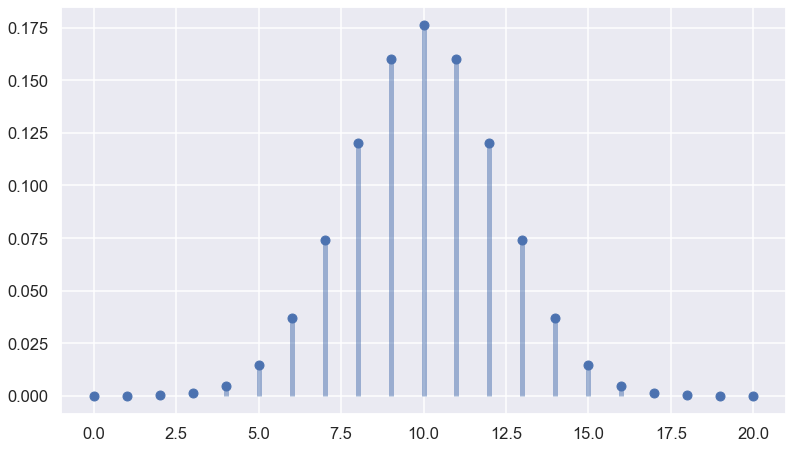

In [243]:
x = np.arange(0,21)
plt.plot(x, my_binomial.pmf(x), "bo")
plt.vlines(x, 0, my_binomial.pmf(x), colors='b', lw=5, alpha=0.5)

### What is acceptable for me?

Whatever result we got if we were to flip the coin **95 times**

## Experiment

In [244]:
my_friend = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

In [245]:
my_friend.count(1)

14

<AxesSubplot:ylabel='count'>

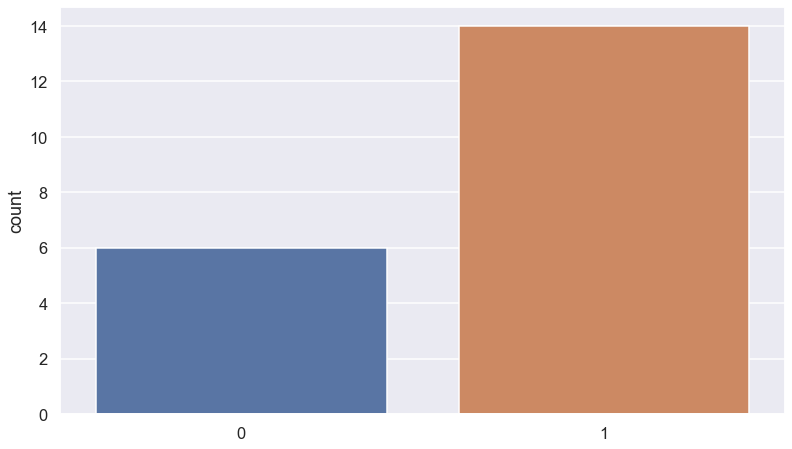

In [246]:
sns.countplot(x=my_friend)

In [247]:
# Wait, getting more than 10 I did expect, but 14? there's something fishy going on 🧐

![](https://media.giphy.com/media/PV4YusEdNup0s/giphy.gif)

What is then the chance of a fair coin landing at least **14 times on heads out of 20 flips** plus the chance of a fair coin landing **14 times or more on tails out of 20 flips**. 

$P(Observation | H0) = 0.0577 * 2 = 0.1154$

In [248]:
# What is the probability of getting 14 or more H?
my_binomial.pmf(14) + my_binomial.pmf(15) + my_binomial.pmf(16) + my_binomial.pmf(17) + my_binomial.pmf(18) + my_binomial.pmf(19) + my_binomial.pmf(20)

0.05765914916992186

In [249]:
# What is the probability of getting 14 or more H?
my_binomial.cdf(20) - my_binomial.cdf(13)

0.057659149169921875

In [250]:
# Getting 14H or 14T
(my_binomial.cdf(20) - my_binomial.cdf(13)) * 2

0.11531829833984375

## Let's test it

### Binomial test for hypothesis

$P(observation |coinIsFair) = 0.1154$

Returns: **probability** of this happening when coin is fair

In [251]:
# PROB of getting 14H when COIN IS FAIR
binomtest(14, n=N, p=p, alternative='two-sided')

BinomTestResult(k=14, n=20, alternative='two-sided', proportion_estimate=0.7, pvalue=0.11531829833984375)

In [252]:
# The probability that, given the coin is fair, this observation happens is 0.1154

In [253]:
p_value = binomtest(14, n=N, p=p, alternative='two-sided').pvalue
p_value

0.11531829833984375

## Okay, but what do I do with this info?

The calculated `p_value` exceeds 0.05, so the observation is consistent with "the coin is fair": that the observed result of 14 heads out of 20 flips can be ascribed to
chance alone — as it falls within the range of what would happen 95% of the time were
this in fact the case.

Is that good enough for me to think that the coin is fair? If my `p_value` (likelihood of obtaining that result when "coin is fair") is bigger than 0.05, then I can say "Okay, it must have been chance".

However if my `p_value` had been less than 0.05, that would tell me that the likelihood of getting that value being the coin fair is sooooo low, that it couldn't be explained by chance, so there must be other factors.

Then we could say: I don't think the coin is fair.

# Recap of me testing my friendship:

- I have an expected result, which is: everything's fine, it's all good: a fair coin will give me half & half
- We experiment: we flip it 20 times.
- I get 14/ 20. That seems suspicious. Is 14 close enough to what I expected? 
- `Null hypothesis`: everything's the same
- `Alternative hypothesis` coin is not fair and I'll get a different result
- I do a binomial `test` to get the ptobability of that same result happening given the coin is fair
- I compare the p_value to my confidence interval (95): I will get this observation at least once by doing to the experiment 95 times
- Is my `p_value lower than that 0.05?` Then it is extremely improbable it happened due to chance. It must be tricked
- Is my p_value within that 95% range? Then it can be explained by chance

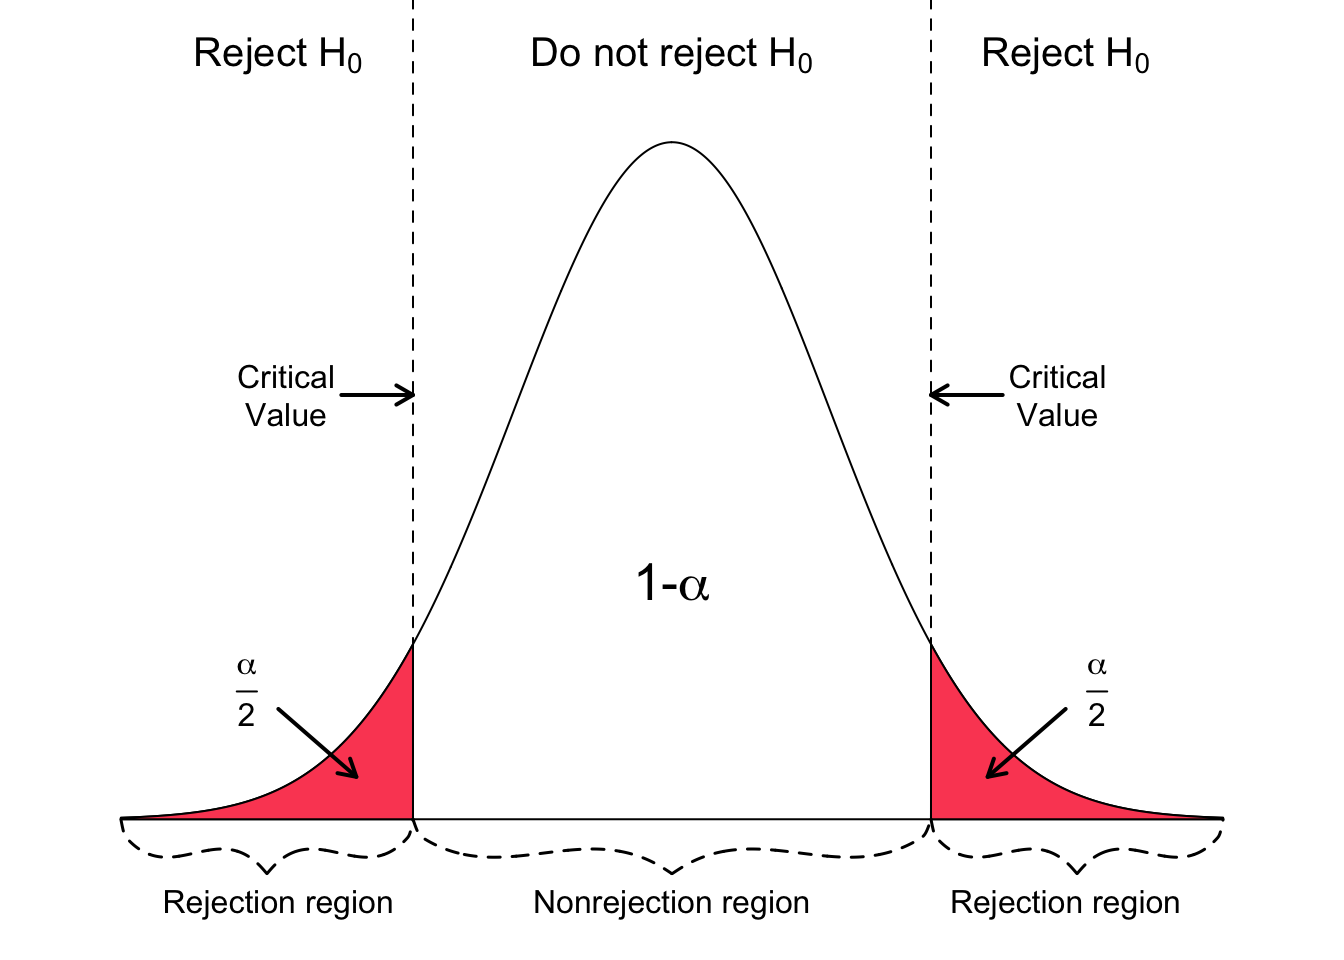

# In other words

1. I obtain a sample
2. I declare `Null hypothesis`: "There's no difference"
3. I declare `Alternative hypothesis`: "There is a difference, either on the high end or the low end"
4. I use a statitical test: binomial test
5. I check the probability that the result happened due to chance: `p_value`
6. I check if the `p_value` falls within or outside the confidence interval
7. If in: I don't have enough evidence to say it's not due to chance. 
8. If out: I reject null hypothesis and take the alternative: there's a difference

## Some misunderstandings of p-values:

1. The p-value is not the probability that the null hypothesis is true. (This false
conclusion is used to justify the “rule” of considering a result to be significant if
its p-value is very small (near zero).
2. The p-value is not the probability of falsely rejecting the null hypothesis.
3. 1 − (p-value) is not the probability of the alternative hypothesis being true.
4. The significance level of the test is not determined by the p-value.
The significance level of a test is a value that should be decided upon by the
researcher interpreting the data before the data are viewed, and is compared
against the p-value or any other statistic calculated after the test has been
performed.

## Null hypothesis vs. Alternative hypothesis

If this was a trial

![Judge Judy](https://media.giphy.com/media/Emg9qPKR5hquI/giphy.gif)

- **Null hypothesis**: guilty until proven otherwise. Veredict: "not guilty" (instead of innocent). There's not enouch evident to say they are guilty

- **Alternative hypothesis**: we do have enough evidene to say the person is guilty

In [ ]:
- Null hypothesis: There's no change / no effect. Decision (p_value > .05) We don't have enough information
    to reject this hipothesis.
    
There's no evidence for me to send someone to jail -> we can't reject the null hypothesis

In [ ]:
- Alternative hypothesis: we have evidence to reject the null one. 

In [ ]:
- p_value: probability of, given H0 is true (the coin is not tricked), me getting that value
- p_value? i want to contrast this with a value I came up with which is 0.05
- 0.05 I can be 95% that I'll get that result if I were run that experiment 95 times
- So that I can say: that result was expected (coin is not tricked)
- So that I can say: this is so unlikely, that I don't buy that happening out of chance
    
- I know that it is very unlikely because I ran a binominal test


Process


1. Have a question on some data
2. I state the null hypothesis: there's no effect. Drugs: A = B
3. I state the alternative hypothesis:  there's an effect
4. Statistical test (in this case binomialtest)
5. p_value: it was very likely / super unlikely this happend just because, just by chance
6. p_value vs. 0.05 -> decision
7. It's so low, that it cannot be due to chance -> rejecting the null hypothesis and accepting the 
alternative
8. It's a reasonable probability -> Okay, I take it it can happen due to chance

In [ ]:
#### Hypotheses

In [ ]:
- Null: everything's fine, it will work as expected: I'll get 10 
- Alternative: it won't wokr as expected. I'll get a weird number like 19

In [ ]:
#### p_value

p_value = chance of something happening that you're not expecting the outcome for*
p_value = the way we measure if the data is skewed *
p_value = measures if something happens by chance or not
p_value = probability of the observation


p_value = how likely it is for me to get 14 when the coin is fair -> 
the probability of getting a given value when H0 is true

p_value = what I get as a result of the statistical test

In [ ]:
#### Alpha: to what extent I'll take something as reasonable to happen

In [ ]:
- Something to be super weird
- Something to be expected

In [ ]:
### Decision



In [ ]:
alpha = 0.05 # I want this to be my criteria to make a decision

p_value agains alpha

In [ ]:
nullhypotheis = coin is not tricked

In [ ]:
p_value = 0.
alpha = 0.05 # a value: criteria. how much I'm willing to accept the weirdness of something
# threshold


# Decision:

p_value: probability for the event happening, given the H0 is true
alpha: threshold, 0.05, 0.1, 0.01

In [ ]:
Experimental result
Is this weird?
If it is not that weird, expected -> due to chance, chances were it would happen and it did
If it is very very weird -> there's an effect


In [ ]:
UXers are smarter than we are

"yes, they got a higher score, but did they really?" "is there really an effect of them being smarter?"
"is there a difference between groups?" "we're the same group? -> H0"

average data: 89
average ux: 95

In [ ]:
Are they smarter?

Null hypothesis: both groups are equally dumb
Alternative hypothesis: their score will be greater than ours

In [ ]:
statistical test: p_value

In [ ]:
p_value = reasonably likely we get that result

In [ ]:
p_value = suuuuper small, the likelihood 
there are differences

In [ ]:
p_value use: number to check if a hypothesis is true or not
p_value = likelihood of an event happening knowing the H0 is true

In [ ]:
alpha = threshold that will guide my decision
my decision to say when something is weird ot not weird

In [ ]:
Inference
Hypothesis testing: z-test, t-test, ANOVA